# **Rede Neurais Convolucionais**
  Consiste em Rede Neurais em que o algoritmo encontra padrões ao analizar em grupos pequenos invés de globalmente, por exemplo, uma orelha, rabo, pétala, etc, diferente dos Densos que aprendem esses padrões em áreas específicas e de forma global.
  

#**Parâmetros**

### Filtragem
é um padrão de pixels m X n que estamos buscando na imagem. Se procuramos com 32 filtro/padrões então a saida do Mapa terá a profundidade de 32 camadas, sendo cada camada uma matrix que indica se o filtro está presente ou não.

### Tamanho da amostragem
Cada camada foi examinar blocos de pixels m X n, geralmente sendo 3X3 ou 5X5. Também consideramos o Passo ou ritmo em que será feito, se será pulado 1, 2 etc pixels por vez.



# Criando um Rede Neural Convolucional

Classidicando uma base de dados com 10 classes. São 60000 imagens de 32X32 com 6000 imagens para cada classe:

*   Avião
*   Carro
*   Pássaro
*   Gato
*   Cervo
*   Cachorro
*   Sapo
*   Cavalo
*   Navio
*   Caminhão

Base de dados:
[**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html)

## Criando a Rede

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#  Carrega e divide os dados
(treino_images, treino_labels), (teste_images, teste_labels) = datasets.cifar10.load_data()

# Normaliza/escalona os valores do pixel para ficarem entre 0 e 1
treino_images, teste_images = treino_images / 255.0, teste_images / 255.0

nome_classes = ['aviao', 'carro', 'passaro', 'gato', 'cervo',
               'cachorro', 'sapo', 'cavalo', 'navio', 'caminhao']

170500096/170498071 [==============================] - 11s 0us/step


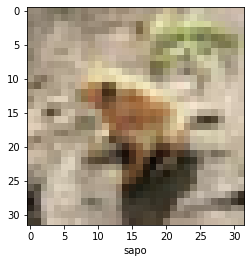

In [7]:
# Mostra as imagems
IMG_INDEX = 7  # Mude para mostrar as imagens

plt.imshow(treino_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(nome_classes[treino_labels[IMG_INDEX][0]]) 
plt.show()

# CNN (convolucional Neual Networks)
A ideai é que usemos os convulucionais e de pooling para descobrir os parâmetros "principais" e depois *achatar* e passar para camadas Densas.

In [9]:
modelo = models.Sequential()
modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))

### **Camada 1**
  32 filtros  de 3X3 com ativação ReLu e formato de 32X32X3 
### **Camada 2**
   Camada que vai performar o pooling com passo 2 em amostras 2X2
### **Camadas seguintes**
   Fazem o mesmo processo, mas dobram o numero de filtros já que usam o mapa resultante da camada anterior, que foi reduzido. Assim, podemos aumentar o filtro dado que será menos custoso computacionalmente.



In [10]:
modelo.summary()  # Faz um sumário do modelo

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


No final a dimensão m X n diminuiu (4 X 4) enquanto a profundidade aumentou. Em seguida, usando camadas Densas para classificar esses parâmetros, vamos "planificar" o os parametros para serem uma linha só ( 4 * 4 * 64).

In [12]:
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation='relu')) # Camada com 64 unidades
modelo.add(layers.Dense(10)) # Saida com 10 unidades

In [13]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

## Treino

In [14]:
modelo.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
historico = modelo.fit(treino_images, treino_labels, epochs=10, 
                    validation_data=(teste_images, teste_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.7473 - accuracy: 0.3497 - val_loss: 1.2441 - val_accuracy: 0.5525
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1822 - accuracy: 0.5810 - val_loss: 1.0720 - val_accuracy: 0.6191
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0241 - accuracy: 0.6409 - val_loss: 0.9863 - val_accuracy: 0.6534
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9102 - accuracy: 0.6820 - val_loss: 0.9224 - val_accuracy: 0.6745
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8294 - accuracy: 0.7078 - val_loss: 0.9692 - val_accuracy: 0.6689
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7631 - accuracy: 0.7292 - val_loss: 0.8772 - val_accuracy: 0.6974
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7082 - accuracy: 0.7503 - val_loss: 0.8892 -

### Avaliando

In [16]:
teste_perda, teste_acu = modelo.evaluate(teste_images,  teste_labels, verbose=2)
print(teste_acu)

313/313 - 3s - loss: 0.9136 - accuracy: 0.6988
0.6988000273704529
